# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

## 1. Cargamos los datos

In [11]:
df = pd.read_csv('data/df_furniture.csv', parse_dates = ['Month']) #esta columna es de meses
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


## 2. Tratar la fecha como texto y parsear

In [12]:
df['year'] = pd.DatetimeIndex(df['Month']).year
df['month'] = pd.DatetimeIndex(df['Month']).month
df['day'] = pd.DatetimeIndex(df['Month']).day
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)
print(df.head())

                Month  furniture_price_adjusted    year  month  day
date                                                               
1992-01-01 1992-01-01               2073.432724  1992.0    1.0  1.0
1992-02-01 1992-02-01               2114.485812  1992.0    2.0  1.0
1992-03-01 1992-03-01               2260.570891  1992.0    3.0  1.0
1992-04-01 1992-04-01               2255.103236  1992.0    4.0  1.0
1992-05-01 1992-05-01               2331.414618  1992.0    5.0  1.0


In [13]:
print(df.index.dtype)

datetime64[ns]


## 3. ¿De qué fecha a qué fecha va el histórico?

In [14]:
print("Desde que fecha a que fecha:")
print(df.index.min().strftime('%Y-%m-%d'), "hasta", df.index.max().strftime('%Y-%m-%d'))

Desde que fecha a que fecha:
1992-01-01 hasta 2019-07-01


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

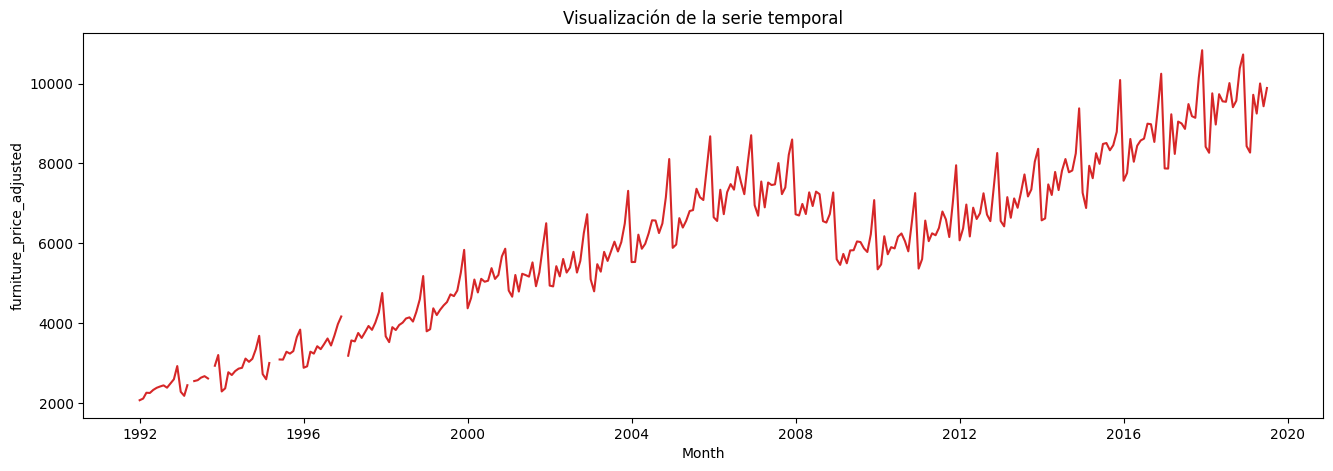

In [17]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='furniture_price_adjusted', dpi=100):
   plt.figure(figsize=(16,5), dpi=dpi)
   plt.plot(x, y, color='tab:red')
   plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
   plt.show()
plot_df(df, x=df.index, y=df.furniture_price_adjusted, 
       title='Visualización de la serie temporal') 

**Tendencia**

Se puede apreciar una clara tendencia, osea que crece. Esta tendencia está a lo largo del tiempo.
La serie comienza alrededor de 2000 unidades en el año 1992 y termina alrededor de 9000 unidades en 2019.
Se puede decir en conclusión que es lineal, aunque se presentan también fluctuaciones. 

**Estacionalidad**

Se puede apreciar un patrón estacional que se repite de manera regular.
Se puede observar en la gráfica picos que ocurren en intervalos regulares.
Cada 12 meses se repite el ciclo.

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

Resultados del Test de Dickey-Fuller:
Estadístico ADF: -1.1286
p-value: 0.7036
Valores Críticos:
	1%: -3.4512
	5%: -2.8707
	10%: -2.5717


<Figure size 1440x480 with 0 Axes>

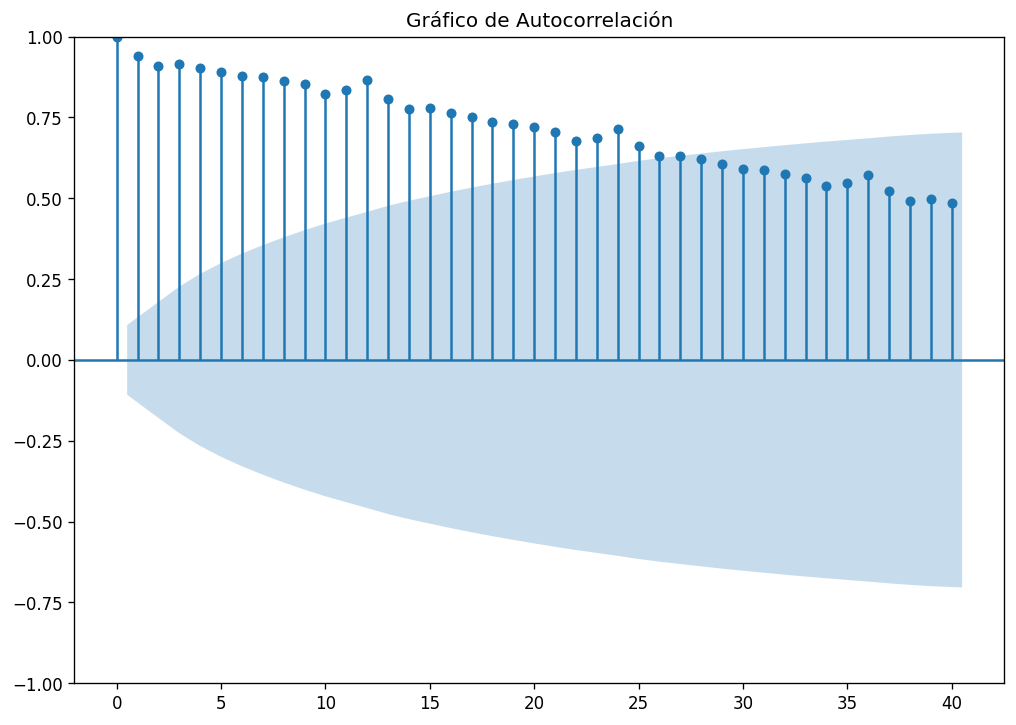

In [19]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Aplicamos para ello el test de Dickey-Fuller
    result = adfuller(timeseries)
    
    print('Resultados del Test de Dickey-Fuller:')
    print(f'Estadístico ADF: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Valores Críticos:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

# Aplicamos el test
test_stationarity(df.furniture_price_adjusted)

from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
plot_acf(df.furniture_price_adjusted, lags=40)
plt.title('Gráfico de Autocorrelación')
plt.show()

Se puede aplicar dos maneras estadísticas para demostrar que la serie no es estacionaria y de esta manera confirmarlo, estas dos maneras son a partir de:

* Aplicar el test de Dickey-Fuller (Mirar p-valor)
* Aplicar el gráfico de autocorrelación para ver estacionalidad.

Se observa que el p-valor es > que 0.05 por tanto H1 no es, nos pasamos a la H0, osea la hipótesis nula. Es decir, si fuera estacionaria tendría que habernos dado un valor de p-valor<0.05. Además de ello, si el estadístico ADF > valores críticos, la serie no es estacionaria.

En el Gráfico de Autocorrelación, los picos se repiten cada 12 "lags" confirman que hay estacionalidad.

## 6. ¿Conoces algún método para representar mejor la tendencia?

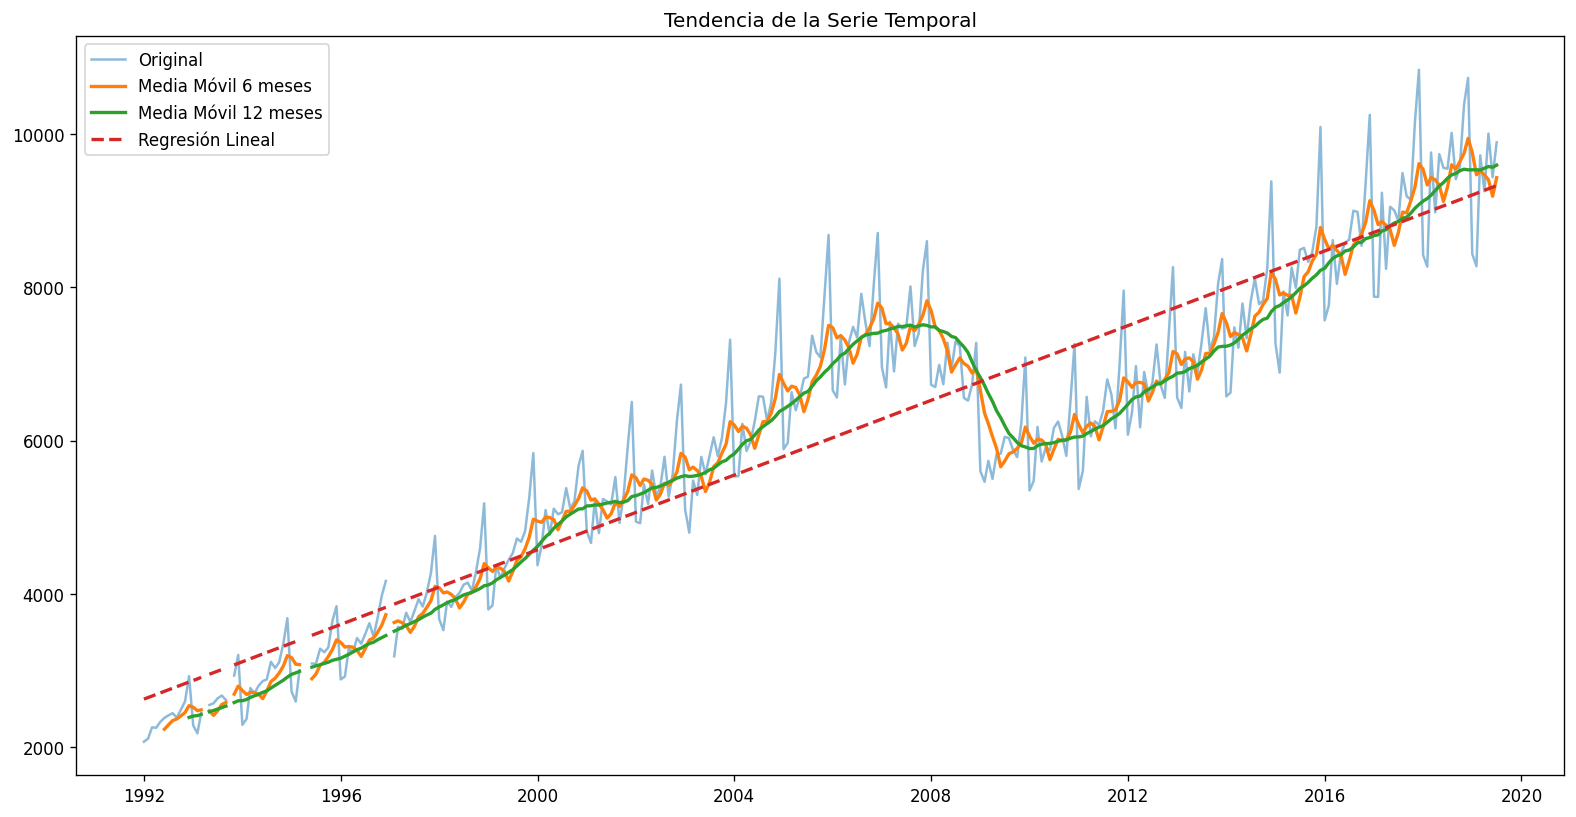

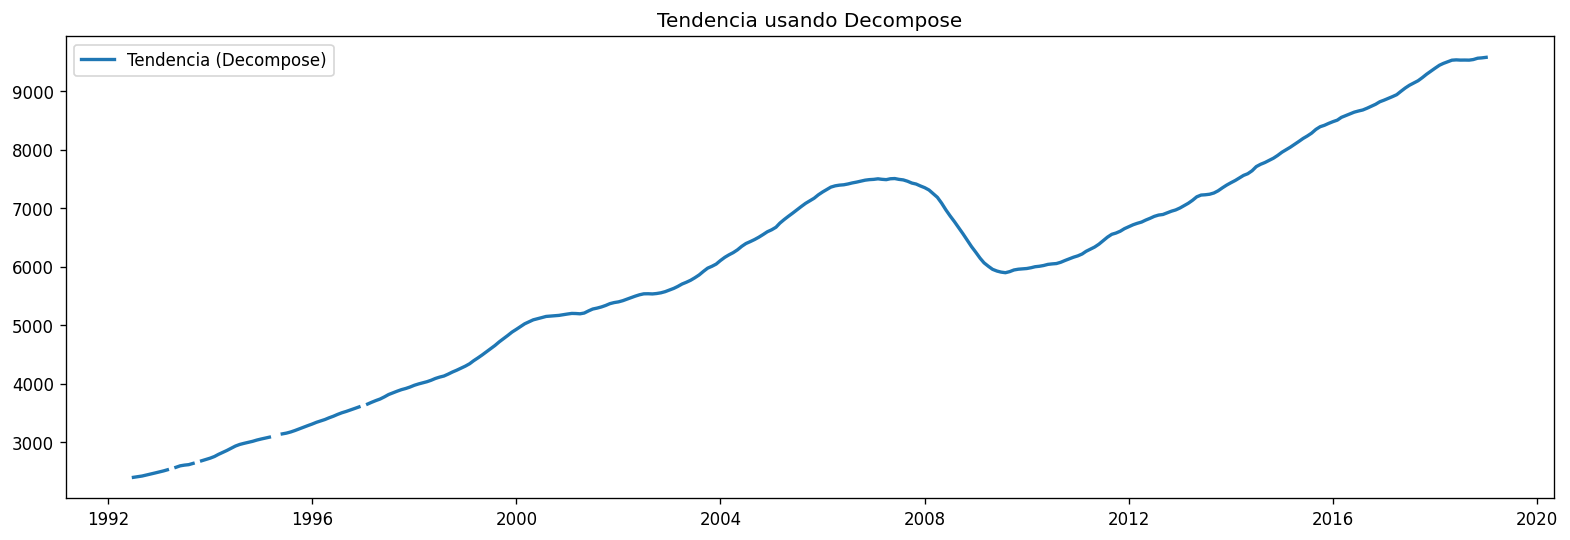

In [20]:
# 1.Empleando la Media Móvil (Moving Average)
ma_6 = df.furniture_price_adjusted.rolling(window=6).mean()  # Es la Media móvil de 6 meses
ma_12 = df.furniture_price_adjusted.rolling(window=12).mean()  #Es la Media móvil de 12 meses

# 2.Empleando Regresión Lineal
from sklearn.linear_model import LinearRegression
X = np.arange(len(df)).reshape(-1, 1)
y = df.furniture_price_adjusted.values
reg = LinearRegression().fit(X, y)
trend_line = reg.predict(X)

# Visualización
plt.figure(figsize=(16,8))
plt.plot(df.index, df.furniture_price_adjusted, label='Original', alpha=0.5)
plt.plot(df.index, ma_6, label='Media Móvil 6 meses', linewidth=2)
plt.plot(df.index, ma_12, label='Media Móvil 12 meses', linewidth=2)
plt.plot(df.index, trend_line, label='Regresión Lineal', linewidth=2, linestyle='--')
plt.title('Tendencia de la Serie Temporal')
plt.legend()
plt.show()

# 3. Usando decompose de statsmodels (solo la tendencia)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.furniture_price_adjusted, period=12)

plt.figure(figsize=(16,5))
plt.plot(df.index, decomposition.trend, label='Tendencia (Decompose)', linewidth=2)
plt.title('Tendencia usando Decompose')
plt.legend()
plt.show()

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

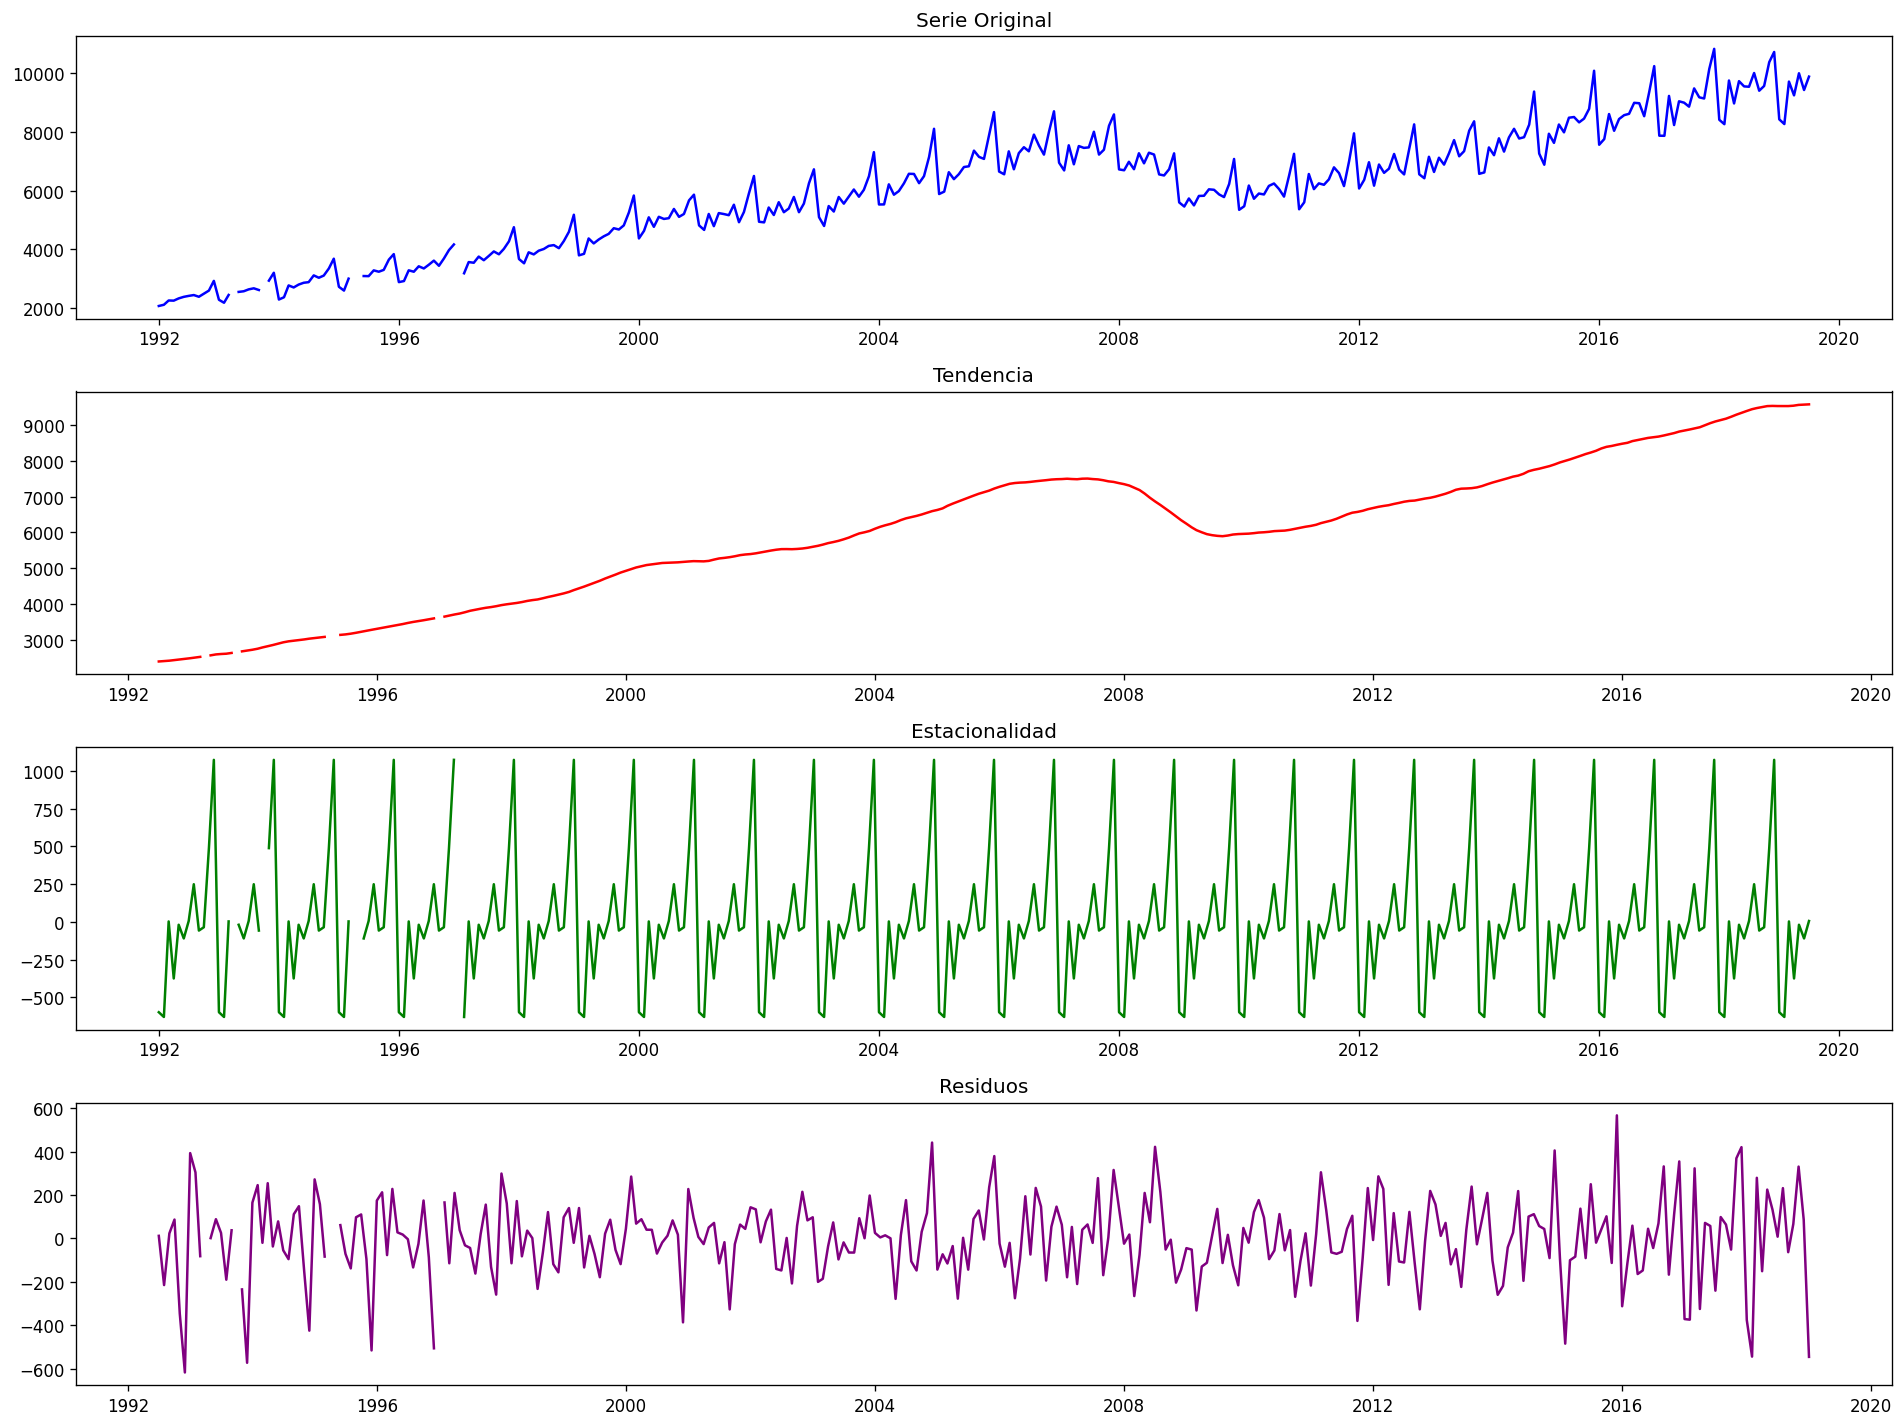

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Procederemos en este apartado a visualizar todos los componentes de la serie temporal.

# Realizamos la descomposición
decomposition = seasonal_decompose(df.furniture_price_adjusted, period=12)

# Creamos la visualización
plt.figure(figsize=(16,12))

# Serie Original
plt.subplot(411)
plt.plot(df.index, df.furniture_price_adjusted, color='blue')
plt.title('Serie Original')
plt.xlabel('')

#Realizamos la Tendencia
plt.subplot(412)
plt.plot(df.index, decomposition.trend, color='red')
plt.title('Tendencia')
plt.xlabel('')

#Realizamos la Estacionalidad
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, color='green')
plt.title('Estacionalidad')
plt.xlabel('')

#Realizamos los Residuos
plt.subplot(414)
plt.plot(df.index, decomposition.resid, color='purple')
plt.title('Residuos')

plt.tight_layout()
plt.show()

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

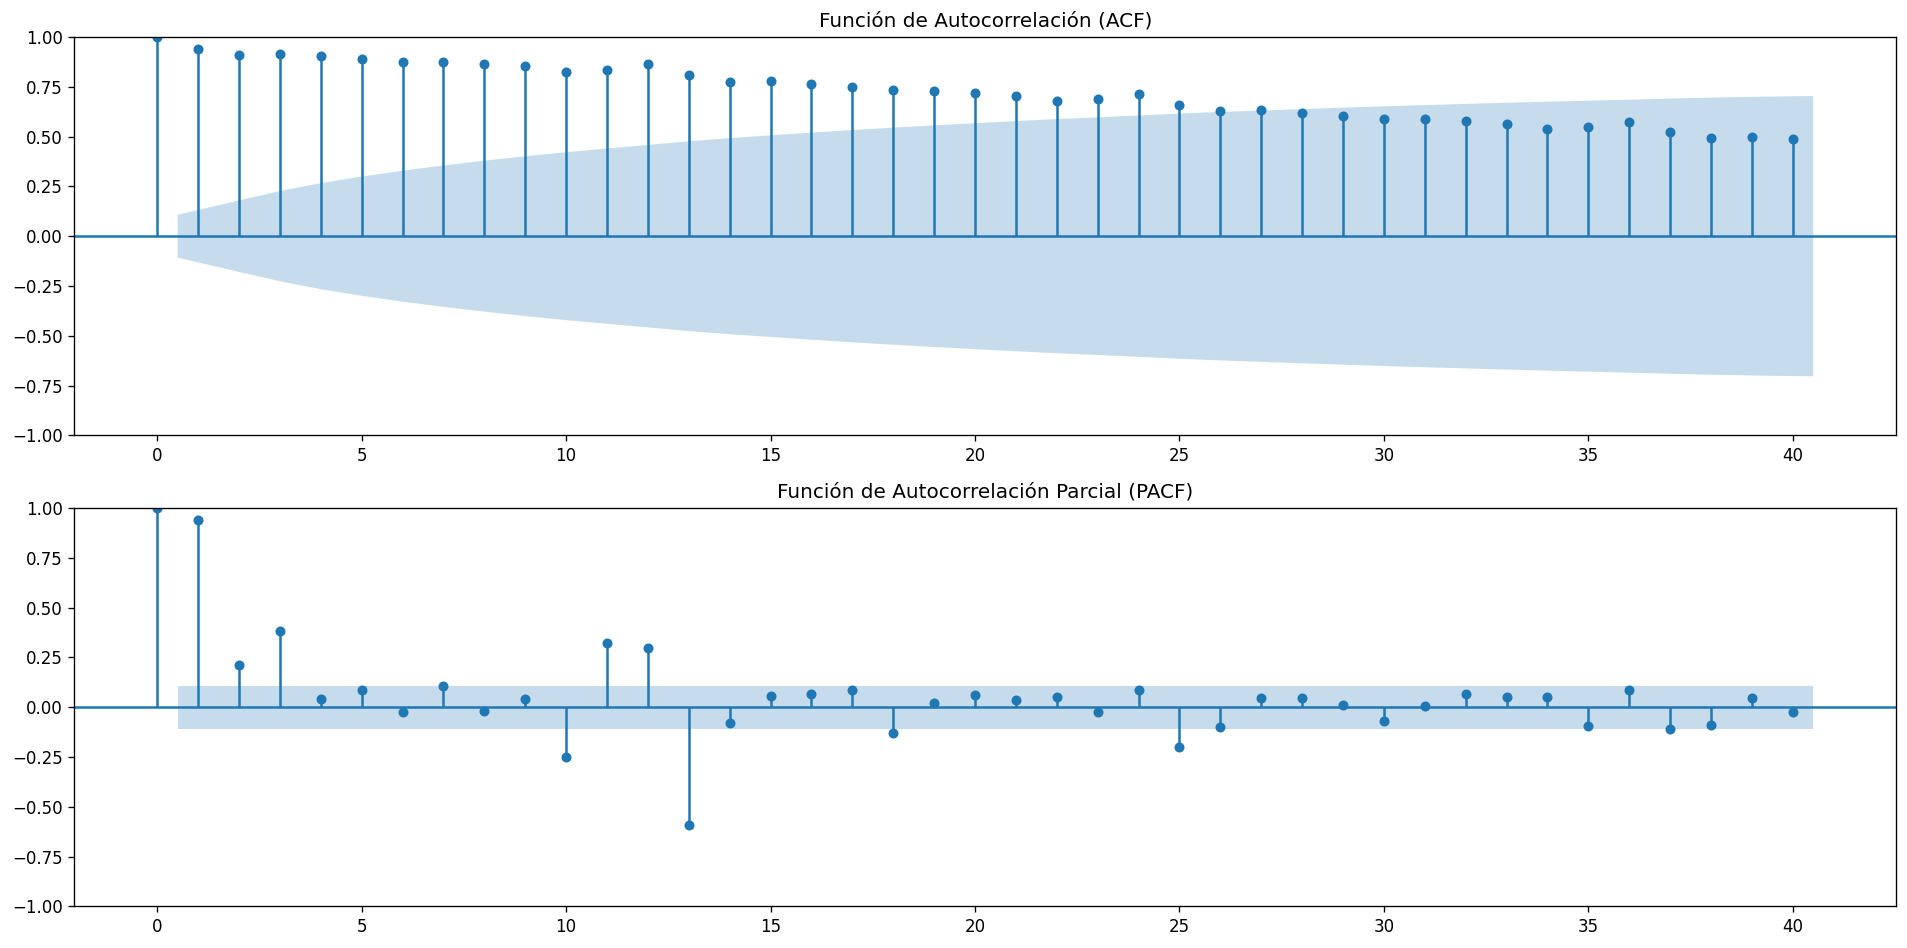

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creamos una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8))
#Aplicamos un gráfico de autocorrelación (ACF)
plot_acf(df.furniture_price_adjusted, lags=40, ax=ax1)
ax1.set_title('Función de Autocorrelación (ACF)')
#Aplicamos un gráfico de autocorrelación parcial (PACF)
plot_pacf(df.furniture_price_adjusted, lags=40, ax=ax2)
ax2.set_title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()

**La Función de Autocorrelación (ACF):**

Los picos significativos que se repiten cada 12 lags confirman la estacionalidad anual

La altura de los picos indica la fuerza de la estacionalidad

El patrón ondulatorio que se repite confirma el ciclo estacional

**La Función de Autocorrelación Parcial (PACF):**

Muestra la correlación directa entre observaciones

Ayuda a identificar el orden del componente estacional

Este análisis confirma, que lo que estamos observando, la serie tiene un fuerte componente estacional con un periodo de 12 meses.

## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.

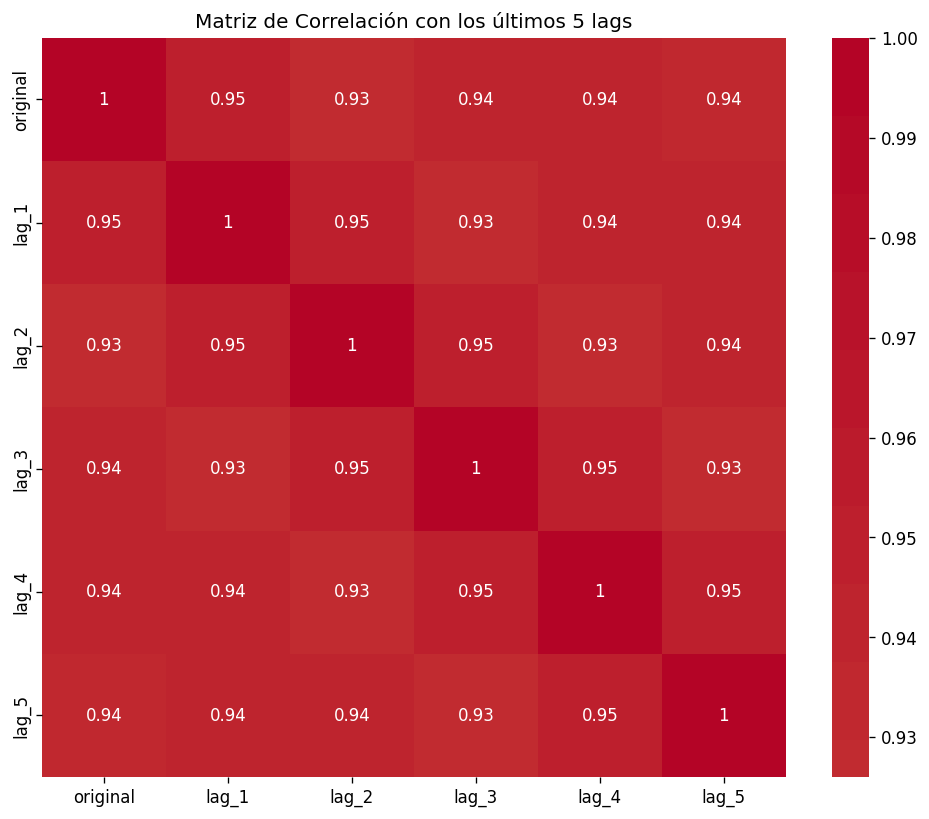


Correlación con la serie original:
Lag 1: 0.9490
Lag 2: 0.9261
Lag 3: 0.9439
Lag 4: 0.9400
Lag 5: 0.9359


In [26]:
# Creamos primeramente un DataFrame con los lags
df_lags = pd.DataFrame()
df_lags['original'] = df.furniture_price_adjusted

# Creamos 5 lags
for i in range(1, 6):
    df_lags[f'lag_{i}'] = df.furniture_price_adjusted.shift(i)

# Eliminamos las filas con NaN para hacer limpieza.
df_lags = df_lags.dropna()

# Calculamos la matriz de correlación
correlation_matrix = df_lags.corr()

# Podemos visualizarlo con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación con los últimos 5 lags')
plt.show()

# Mostramos por último los valores de correlación con la serie original
print("\nCorrelación con la serie original:")
for i in range(1, 6):
    corr = correlation_matrix.iloc[0, i]
    print(f"Lag {i}: {corr:.4f}")

Se puede apreciar que una alta correlación con lags cercanos indica fuerte dependencia temporal.

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

<Figure size 1800x600 with 0 Axes>

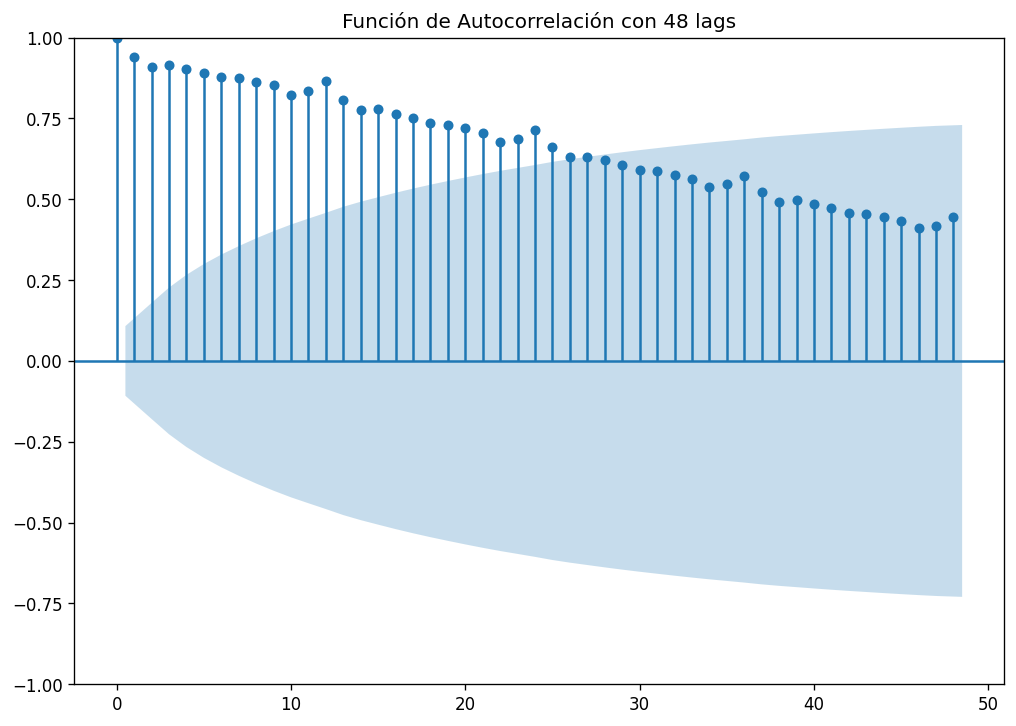

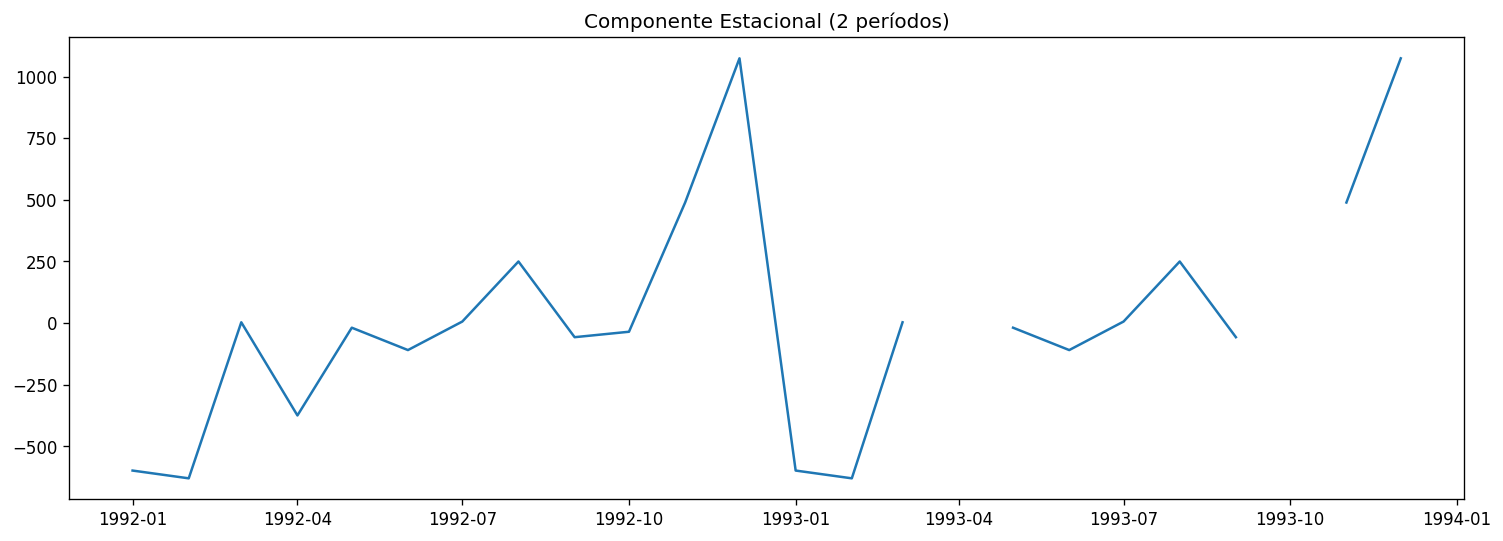

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculamos la autocorrelación para más lags para ver el patrón de forma más clara.
plt.figure(figsize=(15,5))
plot_acf(df.furniture_price_adjusted, lags=48)  # Mostramos 4 años para ver el patrón
plt.title('Función de Autocorrelación con 48 lags')
plt.show()

# También podemos ver la descomposición estacional
decomposition = seasonal_decompose(df.furniture_price_adjusted, period=12)
plt.figure(figsize=(15,5))
plt.plot(decomposition.seasonal[:24])  # Mostramos 2 períodos
plt.title('Componente Estacional (2 períodos)')
plt.show()

La estacionalidad se cumple cada 12 instantes (meses) porque:

* Los picos en el ACF se repiten cada 12 lags.
* El componente estacional muestra un patrón que se repite cada 12 meses.

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

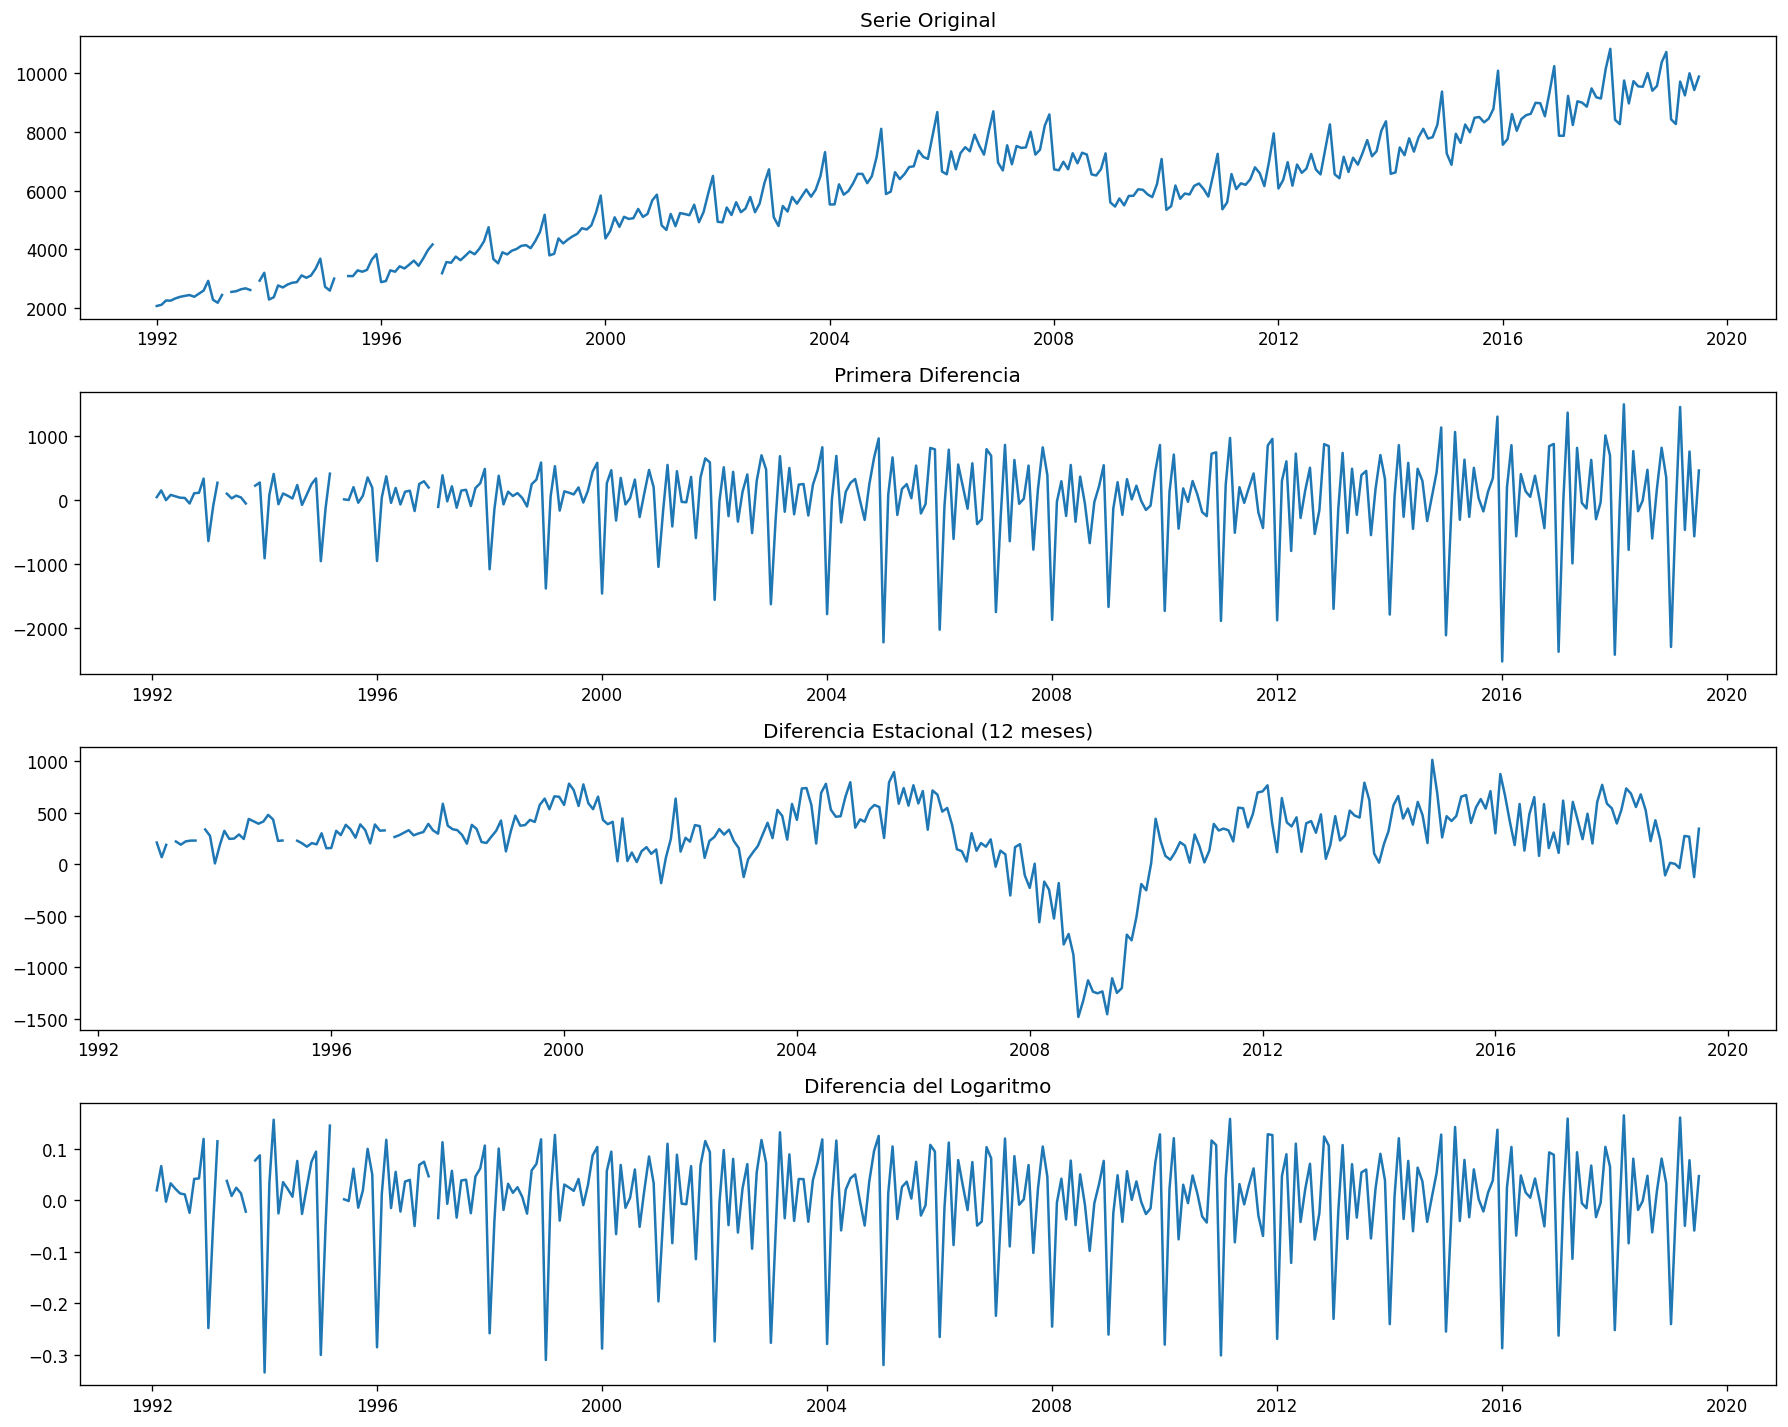


Test de Dickey-Fuller para Primera Diferencia:
Estadístico ADF: -3.1175
p-value: 0.0253

Test de Dickey-Fuller para Diferencia Estacional:
Estadístico ADF: -2.6085
p-value: 0.0913

Test de Dickey-Fuller para Diferencia del Logaritmo:
Estadístico ADF: -3.1957
p-value: 0.0202


In [28]:
# 1. Diferenciación
df['diff_1'] = df.furniture_price_adjusted.diff()  # Primera diferencia
# 2. Diferenciación estacional
df['diff_12'] = df.furniture_price_adjusted.diff(12)  # Diferencia estacional (12 meses)
# 3. Transformación logarítmica y diferenciación
df['log'] = np.log(df.furniture_price_adjusted)
df['log_diff'] = df['log'].diff()
# Visualización de los resultados
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
# Serie original
axes[0].plot(df.furniture_price_adjusted)
axes[0].set_title('Serie Original')
# Primera diferencia
axes[1].plot(df['diff_1'])
axes[1].set_title('Primera Diferencia')
# Diferencia estacional
axes[2].plot(df['diff_12'])
axes[2].set_title('Diferencia Estacional (12 meses)')
# Diferencia del logaritmo
axes[3].plot(df['log_diff'])
axes[3].set_title('Diferencia del Logaritmo')
plt.tight_layout()
plt.show()
# Verificamos la estacionariedad de las series transformadas
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series, name):
   result = adfuller(series.dropna())
   print(f'\nTest de Dickey-Fuller para {name}:')
   print(f'Estadístico ADF: {result[0]:.4f}')
   print(f'p-value: {result[1]:.4f}')
# Comprobamos cada transformación
check_stationarity(df['diff_1'], 'Primera Diferencia')
check_stationarity(df['diff_12'], 'Diferencia Estacional')
check_stationarity(df['log_diff'], 'Diferencia del Logaritmo')